# Teori dersinde verilen sorular

In [2]:
import numpy as np
import math
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread as imread

# Plot daha büyük gözüksün diye yazılmıştır
plt.rcParams["figure.figsize"] = [21,9]

## 1) 2x2 A matrisi ve 2x1 B matrisi Çarpıp sonucu return eden bir fonk yazınız 

In [3]:

def matris_carp(a,b):
    res = np.zeros([2], np.int32)
    res[0] = a[0,0] * b[0] + a[0,1] * b[1];
    res[1] = a[1,0] * b[0] + a[1,1] * b[1];
    return res


### Veya herhangi 2 matrisi carpan fonksiyonu için :

In [4]:
## Ek olarak, bu fonksiyon genel matris çarpma gerçekleştirir A x B
def matris_carp2(a,b): 
    
    # eğer çarpılacak matrisleri çarpılmazsa (a'nın sütün sayısı b'nın satır sayısı eşit olmalı) None döndürür
    if a.shape[1] != b.shape[0]:  
        return None
    
    # elde edilecek matrisin boyutları :
    #    - Satır sayısı : a matrisin satır sayısı
    #    - Sütün sayısı : b matrisin sütün sayısı
    res = np.zeros([a.shape[0], b.shape[1]])
    
    for i in range(a.shape[0]):
        for j in range(b.shape[1]):
            s = 0
            for t in range(a.shape[1]): # veya b.shape[0]
                s += a[i,t] * b[t,j]
            res[i,j] = s
    return res

## 2) Kendisine gönderilen theta acısı kadar rotate eden dönüşüm matrissini retrrb eden fonk yazınız 


In [5]:
# Theta degeri radians olarak alinmaktadir, yani (math.pi, math.pi*0.5)
def get_rotation_matrix(theta):
    res = np.zeros([2,2])
    res[0,0] = math.cos(theta)
    res[0,1] = - math.sin(theta)
    res[1,0] = math.sin(theta)
    res[1,1] = math.cos(theta)
    return res

**math.radians** fonksiyonu kullanarak aldıpımız açının değere dereceden radiana çevirerek aynı sonuç ta elde ederiz

In [6]:
# Burda ise Theta degeri derece olarak
def get_rotation_matrix_derece(derece):
    res = np.zeros([2,2])
    res[0,0] = math.cos(math.radians(derece))
    res[0,1] = - math.sin(math.radians(derece))
    res[1,0] = math.sin(math.radians(derece))
    res[1,1] = math.cos(math.radians(derece))
    return res

## 3) Shear_x Shear_y dergerli alip, x ve y axia Shear yapan Matrisi return eden fonksiyonu yazınız ?

In [7]:
def get_shear_matrix(shear_x, shear_y):
    res = np.zeros([2,2])
    res[0,0] = 1
    res[0,1] = shear_x
    res[1,0] = shear_y
    res[1,1] = 1
    return res

## Bedava) Scale_x Scale_y dergerli alip, x ve y axina scale yapan Matrisi return eden fonksiyonu yazınız ?

In [8]:
def get_scale_matrix(scale_x, scale_y):
    res = np.zeros([2,2])
    res[0,0] = scale_x
    res[0,1] = 0
    res[1,0] = 0
    res[1,1] = scale_y
    return res

## 4) Kendisine gönderilen bir resim  ve bir Matrisi alıp resmi Mattison belirttiği şekilde geometrik transformation uygulayan fonk yazınız


Asagidaki **yeniKoselerAl** fonksiyonu verilen bir img ve geometrik mask icin, maski uyguladiktan sonra koseler nerde olacagini hesaplar

Bu koseler daha sonra elde edilecek fotografin ebatlari hesaplamak icin kullanilacak

In [9]:
def yeniKoselerAl(img, gmask):
    s = img.shape
    # ilk once asil fotonun 4 kosenin koordinatlari alalim
    corners = [[0,0], [0,s[1]], [s[0],0], [s[0],s[1]]]
    
    # her bir kose icin nerde olacagini bilmek icin, her birisine maski uygulayalim;
    new_corners = []
    for c in corners:
        new_corners.append(matris_carp(gmask, c))

    xler = []
    yler = []
    for c in new_corners:
        xler.append(c[0])
        yler.append(c[1])
        
    # x ve y eksen uzerinde transfer yaptiktan sonra en kucuk ve en buyuk degerleri elde edelim
    return (min(xler), max(xler), min(yler), max(yler))

In [10]:
def applyTransform(img, gmask):
    xmin, xmax, ymin, ymax = yeniKoselerAl(img, gmask)
    # print(xmin, xmax, ymin, ymax)
    
    # elde edilecek fotografin boyutlari
    res = np.ones([abs(xmax)+abs(xmin)+1, abs(ymax)+abs(ymin)+1])

    x_eklenecek = abs(xmin)
    y_eklnecek = abs(ymin)    

    for i in range (img.shape[0]):
        for j in range(img.shape[1]):
            yeni_koordinat = matris_carp(gmask, [i,j])
            new_i = yeni_koordinat[0] + x_eklenecek
            new_j = yeni_koordinat[1] + y_eklnecek
            
            # asaginda sum(img[i,j]) / len(img[i,j]) yapiyorum cunku eger alinan foto renkli ise
            # renklerin ortak degeri alinacak
            res[new_i, new_j] = sum(img[i,j])/len(img[i,j])
    return res

**applyTransform** fonksiyonu normalde cok basit ama bazi masklar negatif degerler dondurur bazen de asil fotograflarin boyutlarindan daha büyük değerler döndürür ondan dolayı yeni ebat elde edilmeli ve negatif koordanitorlar için ek bir değer eklenmeli (eksenin min değer) yükarıda yapıldığı gibi.

Eğer Yükarıdaki fonksiyonu gibi değil de, ve en basit hali yazmak istiyorsak, aşağıdaki **applyTransforBasit** fonksiyonu gibi olacak.

Ama **Dikkat** bu fonksiyon mask uyguladıktan sonra elde edilecek foto asıl foto'dan farklı boyut ise hata verecek

In [11]:
def applyTransformBasit(img, gmask):
    res = np.ones(img.shape)
    for i in range (img.shape[0]):
        for j in range(img.shape[1]):
            yeni_koordinat = matris_carp(gmask, [i,j])
            new_i = yeni_koordinat[0]
            new_j = yeni_koordinat[1]
            res[new_i, new_j] = sum(img[i,j])/len(img[i,j])
    return res

## Deneme

In [12]:
img = imread('../ipynbs/Bug.png')
mask = get_rotation_matrix_derece(180)

In [13]:
mask_shear_x = get_shear_matrix(-0.5, 0)
img_shear_x = applyTransform(img, mask_shear_x)

mask_shear_y = get_shear_matrix(0, -0.5)
img_shear_y = applyTransform(img, mask_shear_y)

mask_shear_x_ve_y = get_shear_matrix(-0.5, -0.5)
img_shear_x_ve_y = applyTransform(img, mask_shear_x_ve_y)

mask_rotate_radian = get_rotation_matrix(1/6 * math.pi) # 1/6 pi yani 30 derece
img_rotate_radian = applyTransform(img, mask_rotate_radian)

mask_rotate_derece = get_rotation_matrix_derece(85)
img_rotate_derece = applyTransform(img, mask_rotate_derece)

mask_scale_x = get_scale_matrix(0.5,1)
img_scale_x = applyTransform(img, mask_scale_x)

mask_scale_y = get_scale_matrix(1,0.5)
img_scale_y = applyTransform(img, mask_scale_y)

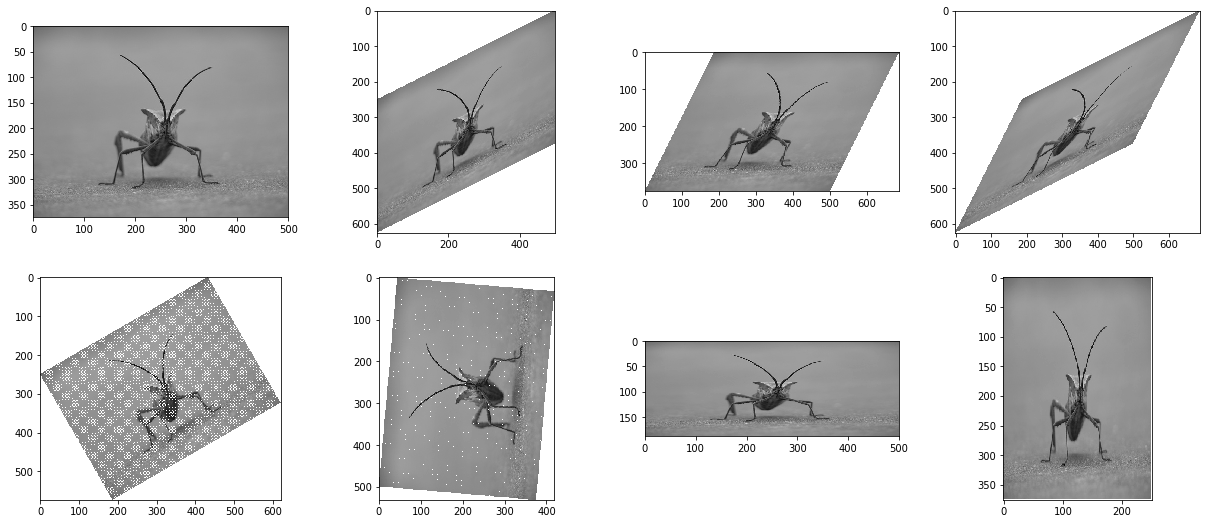

In [14]:
plt.subplot(2,4,1); plt.imshow(img,cmap='gray')
plt.subplot(2,4,2); plt.imshow(img_shear_x,cmap='gray')
plt.subplot(2,4,3); plt.imshow(img_shear_y,cmap='gray')
plt.subplot(2,4,4); plt.imshow(img_shear_x_ve_y,cmap='gray')
plt.subplot(2,4,5); plt.imshow(img_rotate_radian,cmap='gray')
plt.subplot(2,4,6); plt.imshow(img_rotate_derece,cmap='gray')
plt.subplot(2,4,7); plt.imshow(img_scale_x,cmap='gray')
plt.subplot(2,4,8); plt.imshow(img_scale_y,cmap='gray')

plt.show()

## 5) 4te elde edilen resimdeki - x    - y yok edecek translation (öteleme) fonk yazınız


Zaten yapıldı diyebilir miyiz ?

## 6) Bir Matrisi verilen yeni bir vektörlerle ifade edip sonucu geometrik olarak yorumlayınız 
Params : t 2x2, v 2x2